In [1]:
import pandas as pd
path="datasets/babynames/yob1880.txt"
names1880=pd.read_csv(path,names=["name","sex","births"])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [2]:
names1880.groupby("sex").size()

sex
F     942
M    1058
dtype: int64

In [3]:
names1880.groupby("sex").sum()

,births
sex,
F,90993
M,110493


### pandas: concat

In [16]:
import numpy as np
years=np.arange(1880,2011)
pieces=[]
columns=["names","sex","births"]
for year in years:
    path="datasets/babynames/yob"+str(year)+".txt"
    piece=pd.read_csv(path,names=columns)
    piece["year"]=year
    pieces.append(piece)
data=pd.concat(pieces,ignore_index=True)
data.head()

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### pandas: pivot table

In [8]:
births_by_year=data.pivot_table("births",index="year",columns="sex",aggfunc="sum")
births_by_year.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


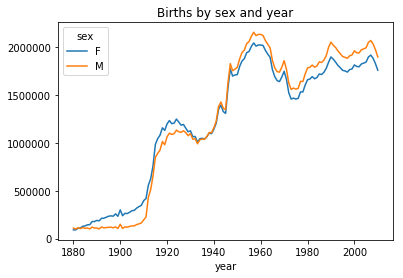

In [10]:
%matplotlib inline
births_by_year.plot(title="Births by sex and year")

### pandas: apply

In [21]:
def add_prop(group):
    group["prop"]=group.births/group.births.sum()
    
    return group
data_=data.groupby(["year","sex"]).apply(add_prop)
data_.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### np.allclose

In [22]:
np.allclose(data_.groupby(["year","sex"]).prop.sum(),1)

True

In [25]:
def top1000(group):
    return group.sort_index(by="births",ascending=False)[:1000]
grouped=data_.groupby(["year","sex"])
top1000=grouped.apply(top1000)
top1000.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


names sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

### pandas: pivot_table

In [30]:
total_births=top1000.pivot_table("births",index="year",columns="names",aggfunc="sum")
total_births.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


names,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [32]:
subset=total_births[["John","Harry","Mary","Marilyn"]]
subset.head()

names,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EAFF33BA8>,
      dtype=object)

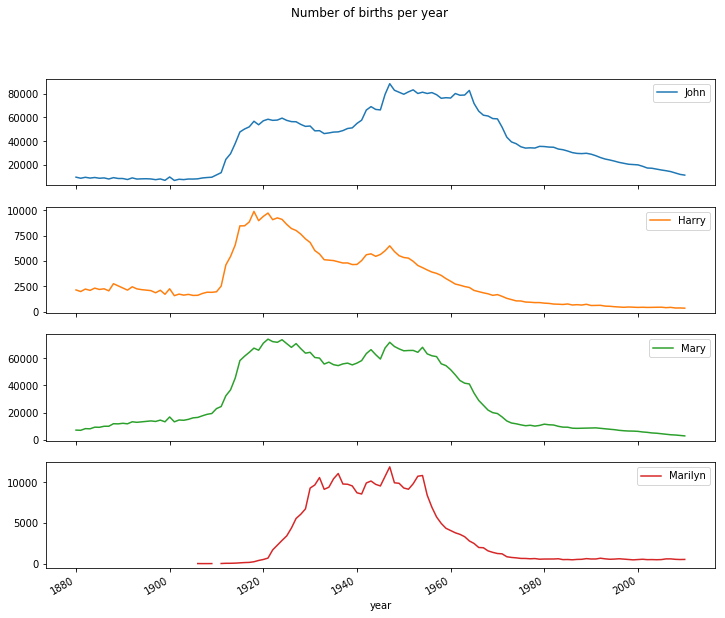

In [33]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


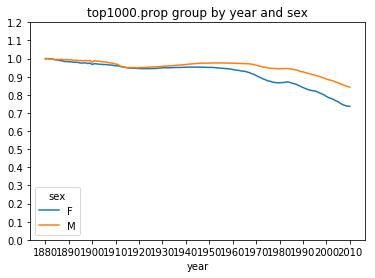

In [37]:
props_table=top1000.pivot_table("prop",index="year",columns="sex",aggfunc="sum")
props_table.plot(title="top1000.prop group by year and sex",
                yticks=np.linspace(0,1.2,13),xticks=np.arange(1880,2020,10))

In [38]:
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]

In [39]:
boys_2010=boys[boys.year==2010]
boys_2010_cumsum=boys_2010.sort_index(by="prop",ascending=False).prop.cumsum()
boys_2010_cumsum.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
Name: prop, dtype: float64

In [41]:
boys_2010_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [43]:
boys_1900=boys[boys.year==1900]
boys_1900_cumsum=boys_1900.sort_index(by="prop",ascending=False).prop.cumsum()
boys_1900_cumsum.searchsorted(0.5)

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


array([24], dtype=int64)

### pandas: apply

In [46]:
def quantile_count(group,q=0.5):
    tmp=group.sort_index(by="prop",ascending=False).prop.cumsum()
    return tmp.searchsorted(q)[0]+1
diversity=top1000.groupby(["year","sex"]).apply(quantile_count)


C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [49]:
diversity=diversity.unstack("sex")
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


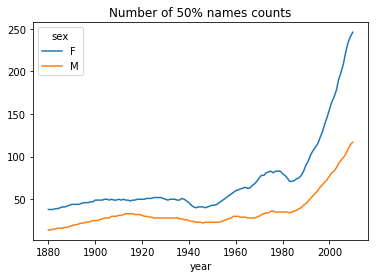

In [50]:
diversity.plot(title="Number of 50% names counts")